#K近傍法（KNN）で異常検知をやってみよう！

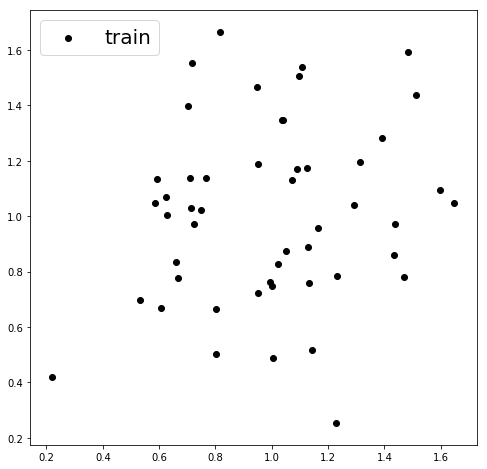

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

x = np.random.normal(1, 0.3, (1, 50))
y = np.random.normal(1, 0.3, (1, 50))

plt.figure(figsize=(8,8))
plt.scatter(x,y,c="black",label="train")
plt.legend(fontsize=20)
plt.show()

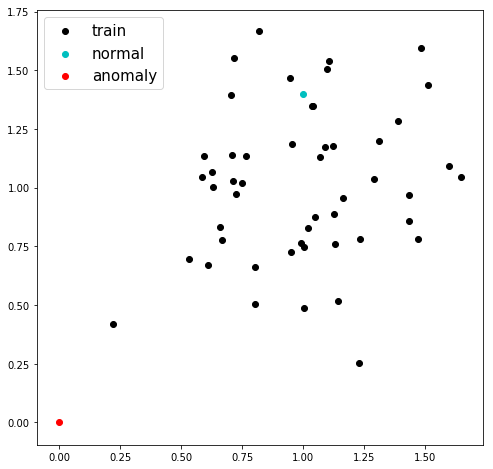

In [2]:
normal = np.array([])#正常っぽい点を自分で入力 ex.1,1.4
anomaly = np.array([])#異常っぽい点を自分で入力 ex.0,0

plt.figure(figsize=(8,8))
plt.scatter(x,y,c="black",label="train")
plt.scatter(normal[0],normal[1],c="c",label="normal")
plt.scatter(anomaly[0],anomaly[1],c="r",label="anomaly")
plt.legend(fontsize=15)
plt.show()

参考URL
http://hktech.hatenablog.com/entry/2018/10/24/000244#k-%E8%BF%91%E5%82%8D%E6%B3%95-k-NN

In [3]:
knn = NearestNeighbors(n_neighbors=5)
knn.fit(np.vstack((x,y)).T)
d1 = knn.kneighbors(normal.reshape(1,-1))[0]
d2 = knn.kneighbors(anomaly.reshape(1,-1))[0]
print("finish")

finish


In [4]:
print(d1)
print(d2)

[[0.06532094 0.0679961  0.08394305 0.14183448 0.17456893]]
[[0.47531818 0.87712428 0.90439158 0.94616114 1.02218561]]


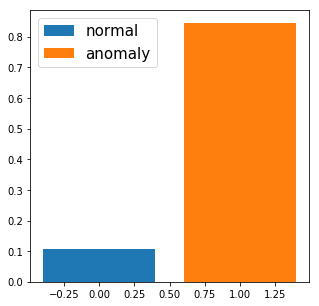

In [5]:
plt.figure(figsize=(5,5))
plt.bar(0,np.mean(d1),label="normal")
plt.bar(1,np.mean(d2),label="anomaly")
plt.legend(fontsize=15)
plt.show()

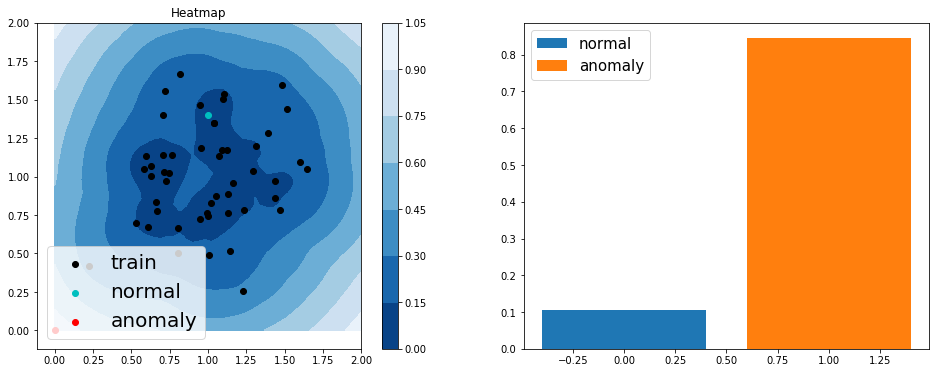

In [6]:
xx, yy = np.meshgrid(np.linspace(0, 2, 50), np.linspace(0, 2, 50))
Z = knn.kneighbors(np.c_[xx.ravel(), yy.ravel()])[0]
Z = np.mean(Z,axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title("Heatmap")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
plt.colorbar()
plt.scatter(x,y,c="black",label="train")
plt.scatter(normal[0],normal[1],c="c",label="normal")
plt.scatter(anomaly[0],anomaly[1],c="r",label="anomaly")
plt.legend(fontsize=20)

plt.subplot(1,2,2)
plt.bar(0,np.mean(d1),label="normal")
plt.bar(1,np.mean(d2),label="anomaly")
plt.legend(fontsize=15)
plt.show()

#スケールは揃えましょう

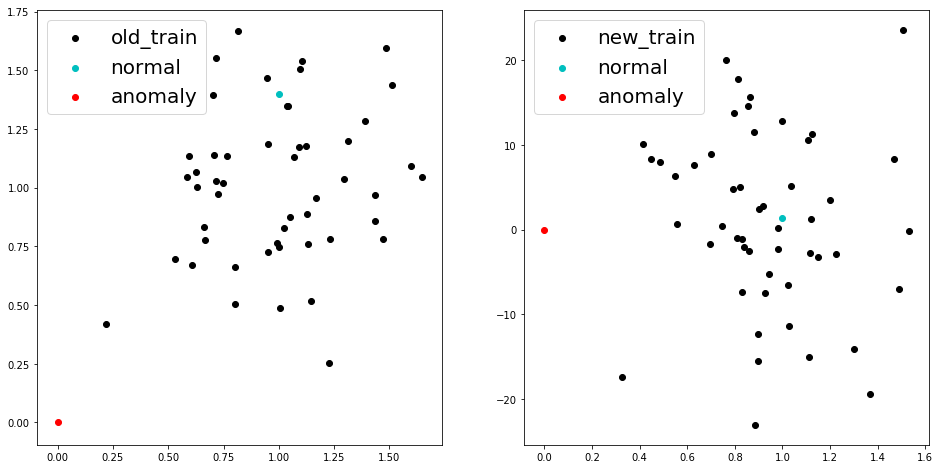

In [7]:
x_new = np.random.normal(1, 0.3, (1, 50))
y_new = np.random.normal(1, 10, (1, 50))

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(x,y,c="black",label="old_train")
plt.scatter(normal[0],normal[1],c="c",label="normal")
plt.scatter(anomaly[0],anomaly[1],c="r",label="anomaly")
plt.legend(fontsize=20)

plt.subplot(1,2,2)
plt.scatter(x_new,y_new,c="black",label="new_train")
plt.scatter(normal[0],normal[1],c="c",label="normal")
plt.scatter(anomaly[0],anomaly[1],c="r",label="anomaly")
plt.legend(fontsize=20)
plt.show()

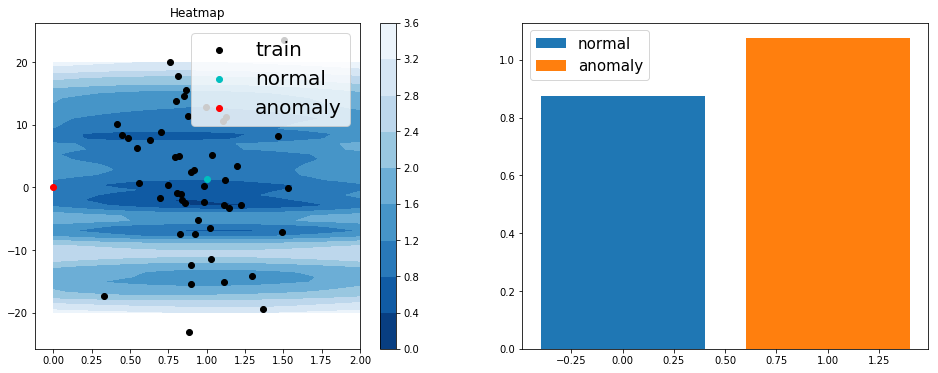

In [8]:
knn = NearestNeighbors(n_neighbors=5)
knn.fit(np.vstack((x_new,y_new)).T)
d1 = knn.kneighbors(normal.reshape(1,-1))[0]
d2 = knn.kneighbors(anomaly.reshape(1,-1))[0]

xx, yy = np.meshgrid(np.linspace(0, 2, 50), np.linspace(-20, 20, 50))
Z = knn.kneighbors(np.c_[xx.ravel(), yy.ravel()])[0]
Z = np.mean(Z,axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title("Heatmap")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
plt.colorbar()
plt.scatter(x_new,y_new,c="black",label="train")
plt.scatter(normal[0],normal[1],c="c",label="normal")
plt.scatter(anomaly[0],anomaly[1],c="r",label="anomaly")
plt.legend(fontsize=20)

plt.subplot(1,2,2)
plt.bar(0,np.mean(d1),label="normal")
plt.bar(1,np.mean(d2),label="anomaly")
plt.legend(fontsize=15)
plt.show()

In [0]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
normal_new = np.zeros(2)
anomaly_new = np.zeros(2)

x_re = ms.fit_transform(x_new.reshape(-1,1))
normal_new[0] = ms.transform(normal[0].reshape(-1,1))
anomaly_new[0] = ms.transform(anomaly[0].reshape(-1,1))

y_re = ms.fit_transform(y_new.reshape(-1,1))
normal_new[1] = ms.transform(normal[1].reshape(-1,1))
anomaly_new[1] = ms.transform(anomaly[1].reshape(-1,1))

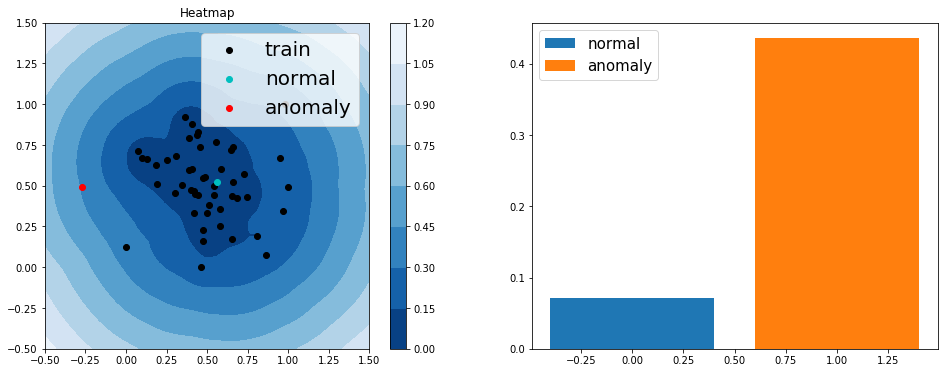

In [10]:
knn = NearestNeighbors(n_neighbors=5)
knn.fit(np.vstack((x_re.T,y_re.T)).T)
d1 = knn.kneighbors(normal_new.reshape(1,-1))[0]
d2 = knn.kneighbors(anomaly_new.reshape(1,-1))[0]

xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 50), np.linspace(-0.5, 1.5, 50))
Z = knn.kneighbors(np.c_[xx.ravel(), yy.ravel()])[0]
Z = np.mean(Z,axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title("Heatmap")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
plt.colorbar()
plt.scatter(x_re,y_re,c="black",label="train")
plt.scatter(normal_new[0],normal_new[1],c="c",label="normal")
plt.scatter(anomaly_new[0],anomaly_new[1],c="r",label="anomaly")
plt.legend(fontsize=20)

plt.subplot(1,2,2)
plt.bar(0,np.mean(d1),label="normal")
plt.bar(1,np.mean(d2),label="anomaly")
plt.legend(fontsize=15)
plt.show()

#LOFで異常検知をやってみよう！

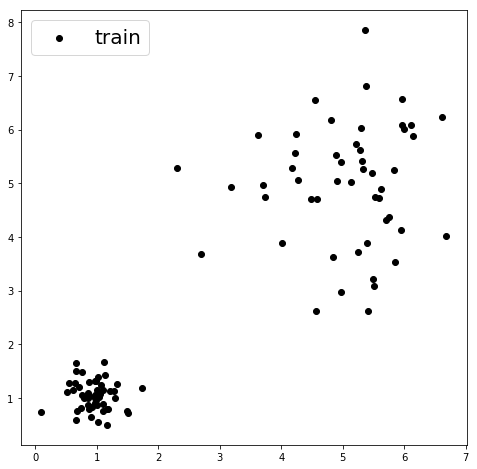

In [11]:
from sklearn.neighbors import LocalOutlierFactor

x1 = np.random.normal(1, 0.3, (1, 50))
y1 = np.random.normal(1, 0.3, (1, 50))

x2 = np.random.normal(5, 1, (1, 50))
y2 = np.random.normal(5, 1, (1, 50))

plt.figure(figsize=(8,8))
plt.scatter(x1,y1,c="black",label="train")
plt.scatter(x2,y2,c="black")
plt.legend(fontsize=20)
plt.show()

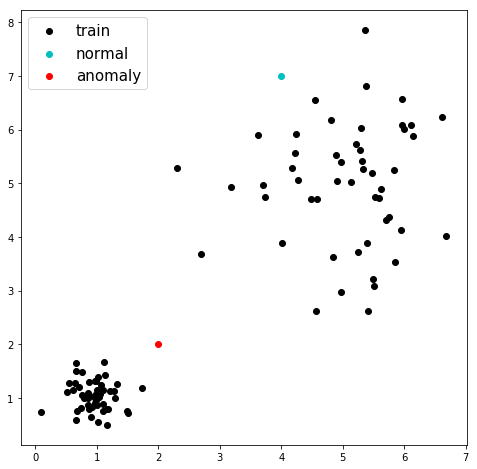

In [12]:
normal = np.array([])#正常っぽい点を自分で入力 ex.4,7
anomaly = np.array([])#異常っぽい点を自分で入力 ex.2,2

plt.figure(figsize=(8,8))
plt.scatter(x1,y1,c="black",label="train")
plt.scatter(x2,y2,c="black")
plt.scatter(normal[0],normal[1],c="c",label="normal")
plt.scatter(anomaly[0],anomaly[1],c="r",label="anomaly")
plt.legend(fontsize=15)
plt.show()

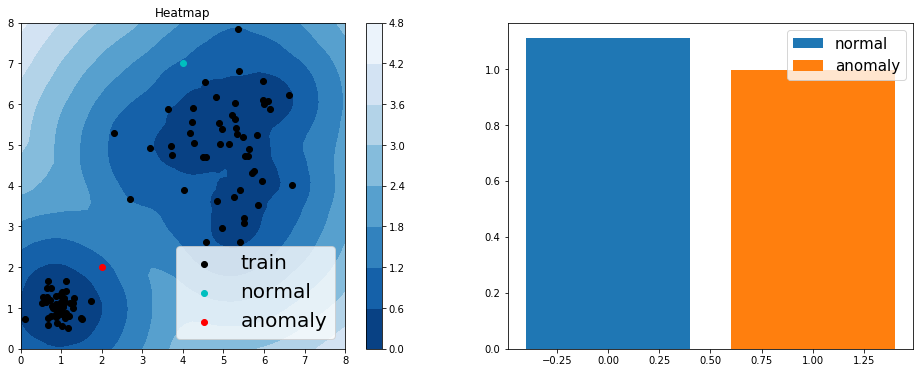

In [13]:
knn = NearestNeighbors(n_neighbors=5)
knn.fit(np.vstack((np.hstack((x1,x2)),np.hstack((y1,y2)))).T)
d1 = knn.kneighbors(normal.reshape(1,-1))[0]
d2 = knn.kneighbors(anomaly.reshape(1,-1))[0]

xx, yy = np.meshgrid(np.linspace(0, 8, 50), np.linspace(0, 8, 50))
Z = knn.kneighbors(np.c_[xx.ravel(), yy.ravel()])[0]
Z = np.mean(Z,axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title("Heatmap")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
plt.colorbar()
plt.scatter(x1,y1,c="black",label="train")
plt.scatter(x2,y2,c="black")
plt.scatter(normal[0],normal[1],c="c",label="normal")
plt.scatter(anomaly[0],anomaly[1],c="r",label="anomaly")
plt.legend(fontsize=20)

plt.subplot(1,2,2)
plt.bar(0,np.mean(d1),label="normal")
plt.bar(1,np.mean(d2),label="anomaly")
plt.legend(fontsize=15)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


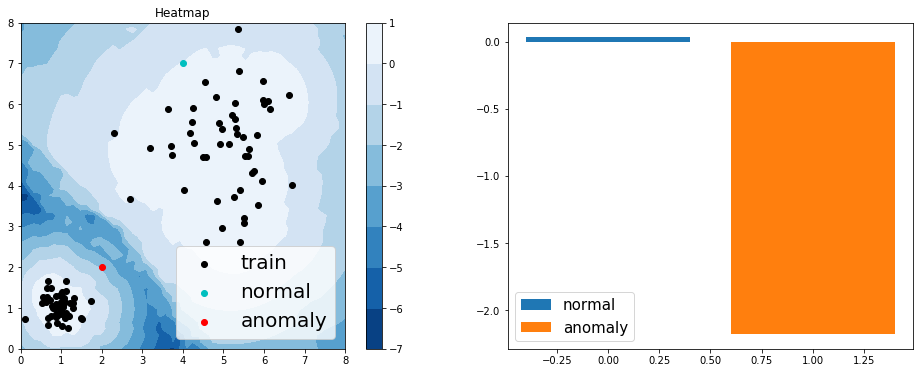

In [14]:
lof = LocalOutlierFactor(n_neighbors=5)
lof.fit(np.vstack((np.hstack((x1,x2)),np.hstack((y1,y2)))).T)
d1 = lof._decision_function(normal.reshape(1,-1))
d2 = lof._decision_function(anomaly.reshape(1,-1))

xx, yy = np.meshgrid(np.linspace(0, 8, 50), np.linspace(0, 8, 50))
Z = lof._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title("Heatmap")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
plt.colorbar()
plt.scatter(x1,y1,c="black",label="train")
plt.scatter(x2,y2,c="black")
plt.scatter(normal[0],normal[1],c="c",label="normal")
plt.scatter(anomaly[0],anomaly[1],c="r",label="anomaly")
plt.legend(fontsize=20)

plt.subplot(1,2,2)
plt.bar(0,np.mean(d1),label="normal")
plt.bar(1,np.mean(d2),label="anomaly")
plt.legend(fontsize=15)
plt.show()